## Welcome to P2 Hands On!

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

# Data Formatting

### 1. Importing Data

Dalam kebanyakan tugas Data Science, file biasanya dikemas dalam format .csv, dan import file dilakukan dengan menulis `pd.read_csv(<nama_file.csv>)`. 

In [6]:
df = pd.read_csv('telco_customer_churn.csv')

In [7]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Namun, selain `csv`, terdapat banyak sekali tipe data lain yang dapat di-import oleh `pandas`, seperti:
- .xslx (file Excel)
- .parquet (file type berbasis Apache Parquet yang sangat efficient dalam menyimpan data, sehingga memiliki ukuran yang kecil)

Untuk menambah wawasan, mari kita coba menyimpan file `telco_customer_churn.csv` ini ke dalam format Excel dan Parquet, dan bandingkan ukuran file nya. 

In [4]:
df.to_excel('telco_customer_churn.xlsx')

In [5]:
df.to_parquet('telco_customer_churn.parquet')

Jika kedua langkah di atas telah dijalankan, seharusnya di folder local tempat teman-teman menyimpan file, sudah terdapat 3 file dengan nama yang sama (telco_customer_churn) namun dengan 'extension' yang berbeda-beda. 

- File .csv memiliki ukuran sekitar 900 KB
- File .xlsx memiliki ukuran sekitar 600-700 KB
- File .parquet memiliki ukuran sekitar 200 KB

Hal ini konsisten dengan apa yang akan teman-teman hadapi di 'dunia kerja' nanti. 
- File .csv bisa dibuka oleh banyak software (karena pada dasarnya file .csv adalah file teks, dan dapat dibuka oleh Notepad), namun cenderung memiliki ukuran yang besar
- File .xlsx hanya bisa dibuka oleh Microsoft Excel (dan Google Spreadsheet) serta beberapa program pengolah data lainnya
- File .parquet tidak bisa dibuka oleh program-program pengolah data atau text editor konvensional, namun sangat baik dalam menekan ukuran file, sehingga untuk data yang sama, ukuran file .parquet jauh lebih kecil (bisa sampai 2-3x) daripada jika file tersebut disimpan dalam format .csv ataupun .xlsx

Jika teman-teman bekerja dengan Stakeholder lain (yang bukan merupakan anggota tim data), maka sangat dianjurkan untuk saling mengirim file dalam format yang lazim (.csv atau .xlsx). Namun, jika teman-teman ingin sharing file di antara sesama Data Scientists, maka dianjurkan untuk menyimpan file dalam format .parquet sehingga cepat untuk disimpan dan dibuka, serta menghemat ukuran. 

### 2. Checking Column Types

Langkah ini terbilang sepele namun sangat penting sebenarnya. 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Data Type 'object' berarti kolom tersebut berisi 'string' (teks). Data type 'int64' berarti kolom tersebut berisi bilangan bulat, tanpa desimal. Selain itu, data type 'float64' berarti kolom tersebut berisi bilangan desimal. 

Sekilas, sepertinya dataset kita baik-baik saja. Semua kolom tidak memiliki `missing value` (Jika ada missing value, pasti ada kolom yang tidak tertulis 7043 non-null). Namun, jika melihat lebih dalam, kolom `TotalCharges` yang seharusnya merupakan obyek `float64` (karena merupakan angka), tercatat sebagai `object`. Ini mesti diperbaiki.

In [9]:
df['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

Cara memperbaikinya adalah dengan menjadikan tipe sebagai `float64`.

In [10]:
df['TotalCharges'].astype('float64')

ValueError: could not convert string to float: ''

Ternyata, terdapat error yang menyatakan tidak bisa mengkonversi `string` menjadi `float`. Berarti, di antara 7043 data tersebut, ada beberapa row yang memiliki `TotalCharges` sebagai `string`. Tugas kita adalah mencarinya.

In [11]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

Langkah di atas artinya memaksa untuk mengubah semua anggota `TotalCharges` ke dalam numerik. Jika error, maka dia akan diubah menjadi `Null`. 

In [12]:
df[df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Terdapat 11 row yang sekarang menunjukkan adanya `Null` atau `missing value` di kolom `TotalCharges`. Ada hal yang janggal - kok `tenure`-nya 0? Tenure = 0 berarti customer tersebut memiliki durasi keanggotaan sebanyak 0 bulan...Berarti belum pernah membayar sama sekali.

In [13]:
df[df['TotalCharges'].isnull()]['MonthlyCharges']

488     52.55
753     20.25
936     80.85
1082    25.75
1340    56.05
3331    19.85
3826    25.35
4380    20.00
5218    19.70
6670    73.35
6754    61.90
Name: MonthlyCharges, dtype: float64

Namun mereka memiliki `MonthlyCharges`. Mereka memiliki tagihan per bulan. Apa ini berarti bulan pertama mereka? Hal ini janggal. 

Bisa dibilang bahwa ini adalah `missing value` yang diketemukan akibat kita melakukan `column profiling`. 

Kalau ini terjadi di dunia kerja, biasanya yang kita lakukan adalah menanyakan langsung ke stakeholdernya, mengapa ada yang `tenure`-nya 0, tapi sudah ada `MonthlyCharges`. Namun, ketika kita melakukan personal project tanpa informasi lebih lanjut ke sumber data, maka kita dapat menghilangkannya (karena datanya tidak make sense). 

Dealing with `missing values` akan dibahas lebih lanjut di pertemuan berikutnya. `

In [15]:
df = df[df['tenure'] != 0].reset_index(drop = True)

df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


### 3. Check Duplicates

In [19]:
df = pd.DataFrame({
    "cust_id": ["C1", "C2", "C3", "C4", "C5", "C6", "C7", "C8", "C9", "C10", "C7"],
    "item_bought": [10,7,5,4,10000, 10, 5, 5, 7, 4, 5],
    "city": ["Bandung", "Jakarta", "Bogor", "Tangerang", "BANDUNG", "Bgr", "Bogor", "BGR", "bdg", "Jakarta", "Bogor"]
    })

df

,cust_id,item_bought,city
0,C1,10,Bandung
1,C2,7,Jakarta
2,C3,5,Bogor
3,C4,4,Tangerang
4,C5,10000,BANDUNG
5,C6,10,Bgr
6,C7,5,Bogor
7,C8,5,BGR
8,C9,7,bdg
9,C10,4,Jakarta


In [20]:
# Check duplicates
df.duplicated().sum()

1

In [21]:
# Handle duplicates dengan menghapus data
df.drop_duplicates()

,cust_id,item_bought,city
0,C1,10,Bandung
1,C2,7,Jakarta
2,C3,5,Bogor
3,C4,4,Tangerang
4,C5,10000,BANDUNG
5,C6,10,Bgr
6,C7,5,Bogor
7,C8,5,BGR
8,C9,7,bdg
9,C10,4,Jakarta


### 4. Check Different Formats

In [28]:
df

,cust_id,item_bought,city
0,C1,10,Bandung
1,C2,7,Jakarta
2,C3,5,Bogor
3,C4,4,Tangerang
4,C5,10000,BANDUNG
5,C6,10,Bgr
6,C7,5,Bogor
7,C8,5,BGR
8,C9,7,bdg
9,C10,4,Jakarta


In [27]:
pd.unique(df['city'])

array(['Bandung', 'Jakarta', 'Bogor', 'Tangerang', 'BANDUNG', 'Bgr',
       'BGR', 'bdg'], dtype=object)

Jika melihat dataframe di atas, kolom `city` memiliki format nama kota yang berbeda-beda (contoh: Bandung sebagai bdg, BANDUNG. Bogor sebagai Bgr, BGR)

Ini perlu kita atasi dengan cara menyeragamkan data-data yang memiliki arti sama namun dalam bentuk berbeda.

In [30]:
df['city'] = df['city'].replace({'BANDUNG': 'Bandung', 'bdg': 'Bandung', 'Bgr': 'Bogor', 'BGR': 'Bogor'})

df

,cust_id,item_bought,city
0,C1,10,Bandung
1,C2,7,Jakarta
2,C3,5,Bogor
3,C4,4,Tangerang
4,C5,10000,Bandung
5,C6,10,Bogor
6,C7,5,Bogor
7,C8,5,Bogor
8,C9,7,Bandung
9,C10,4,Jakarta


# Handling Missing Value

In [33]:
df = pd.read_csv('titanic_dataset.csv')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- PassengerID: nomor ID dari setiap penumpang, hanya tanda pengenal saja
- Survived: 0 berarti 'tidak selamat', 1 berarti 'selamat'
- Pclass: kelas tiket, 1 = kelas 1 (paling mewah), 2 = kelas 2, 3 = kelas 3 (paling rendah)
- Sex: jenis kelamin
- Age: usia
- SibSp: berapa banyak sibling/spouses yang ikut serta di dalam Titanic
- Parch: berapa banyak parents/children yang ikut serta di dalam Titanic
- Ticket: nomor tiket
- Fare: uang yang dibayarkan (biaya) untuk perjalanan
- Cabin: nomor kabin
- Embarked: kota keberangkatan, C = Cherbourg, Q = Queenstown, S = Southampton

Dapat kita lihat dari `df.info()` bahwa terdapat 3 kolom dengan missing values, yaitu `Age`, `Embarked`, dan `Cabin`. 

##### Rule Of Thumb: Ask The Data Provider!

Jika teman-teman sekalian sudah bekerja menjadi Data Scientist, maka hal pertama yang harus dilakukan ketika menemukan missing values adalah mengkonfirmasikannya kepada pemberi datanya (bisa berupa Business Stakeholder, atau Data Engineer). Bisa saja data yang hilang itu diakibatkan oleh adanya kesalahan dalam proses ingestion, sehingga mereka dapat mengetahui adanya gangguan dalam sistem. 

Atau, bisa saja data yang hilang itu terjadi akibat error dalam 'saving the file', dan semestinya data tersebut ada di file originalnya (dengan demikian, mereka dapat mengambil file original tersebut dan memberikannya ke Data Scientist). 

Intinya, jika ada missing values, kita semestinya mengkomunikasikan hal ini kepada stakeholder yang memberikan kita dataset tersebut, dan meluruskan apa yang harus dilakukan. Jika memang tidak ada yang dapat dilakukan, maka barulah kita dapat mencoba beberapa opsi yang akan kita pelajari di bawah ini.

#### Method 1: Drop the Column

Jika kolom tersebut memiliki banyak missing values (lebih dari 50-60%), maka sulit rasanya bisa mendapatkan metode imputasi yang akurat. Apalagi, jika kolom tersebut dirasa memiliki informasi yang minim. 

Jika hal ini terjadi, maka hal yang dapat dilakukan adalah menghilangkan seluruh kolom (tidak menggunakan kolom tersebut dalam EDA / Modelling). Hal ini yang akan kita lakukan kepada kolom `Cabin`. 

In [35]:
df.drop('Cabin', axis = 'columns', inplace = True)

In [36]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

Kolom `Cabin` sudah tidak ada di dataframe kita^.

#### Method 2: Remove the Rows

Apabila missing values kurang dari 50%, maka hal yang dapat dilakukan adalah menghilangkan semua baris dengan missing values. Ini adalah metode yang paling 'mudah', namun memiliki beberapa konsekuensi:
- Kehilangan informasi dari kolom lain yang penting (dalam kebanyakan kasus, baris yang dihilangkan itu sebenarnya tidak bermasalah di kolom-kolom lain)
- Dataset size menjadi sedikit, bila yang dihilangkan cukup banyak 

In [37]:
df_update = df.dropna(axis = 0).reset_index(drop = True)

In [38]:
df_update.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 61.3+ KB


#### Method 3: Mengisi dengan Mean/Median dan Modus

Metode imputasi dengan `mean/median` dan `modus` adalah salah satu metode pengisian nilai missing-values. Dalam kasus ini, missing values tidak dihilangkan, namun dicoba dicari nilai-nilai yang 'masuk akal' untuk mengisi values-values yang hilang ini. 

Untuk kolom numerik, biasanya diisi dengan:
- mean, jika kolom tidak memiliki outlier 
- median, jika kita tidak bisa meyakinkan bahwa koom tersebut tidak memiliki outlier

Untuk kolom kategorikal, biasanya diisi dengan modus (nilai yang paling sering muncul). 

In [39]:
df_update = df.copy()
df_update['Age'] = df_update['Age'].fillna(df_update['Age'].median())
df_update['Embarked'] = df_update['Embarked'].fillna(df_update['Embarked'].mode()[0])

In [40]:
df['Age'].median()

28.0

In [104]:
df_update.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


Konsekuensinya, nilai yang diisi tidak akan terlihat 'natural', apalagi pada kolom yang memiliki banyak missing values. Contohnya adalah pada kolom `Age` berikut ini:

<AxesSubplot:xlabel='Age', ylabel='Count'>

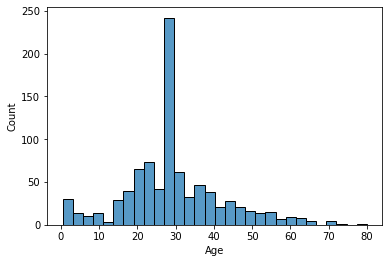

In [42]:
sns.histplot(data = df_update, x = 'Age')

Pada histogram, terlihat bahwa nilai '28.0' yang merupakan nilai `median` menjadi sangat dominan, karena seluruh `missing values` disamaratakan menjadi 28. 

#### Method 4: Regression-Based Imputation

Metode ini digunakan pada kolom numerik. Metode ini menggunakan konsep Regression yang belum dipelajari. Regression sendiri baru dipelajari di day-day berikutnya.

Namun, secara konsep, kita melakukan 'prediksi' pada nilai-nilai 'missing values' menggunakan fakta-fakta dari kolom-kolom lain. 

Maksudnya bagaimana?

Contoh sederhana: 
- Rumah dengan luas 120 meter persegi memiliki harga 4 Miliar
- Rumah dengan luas 150 meter persegi memiliki harga 5 Miliar
- Maka rumah dengan luas 90 meter persegi memiliki harga ??

Estimasi kita pasti menjawab 3 Miliar, bukan?

Nah, kira-kira regression-based estimation adalah seperti itu. 

In [43]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

Mari kita menebak missing-values pada kolom `Age` dengan bantuan kolom-kolom `Pclass`, `SibSp`, `Parch`, dan `Fare`.

In [47]:
from sklearn.linear_model import LinearRegression
### Membuat sebuah LinearRegression
lr = LinearRegression()

### Seleksi kolom-kolom yang digunakan
selected_cols = ['Age', 'Pclass', 'SibSp', 'Parch', 'Fare']

### Bagi menjadi Missing dan Training. Missing Df berisi baris-baris dengan 'Age' kosong.
missing_df = df[df['Age'].isnull()==True][selected_cols]
training_df = df[df['Age'].isnull()==False][selected_cols]

### Buatlah model regression dari baris-baris yang tidak memiliki missing values
y_train = training_df['Age']
x_train = training_df.drop('Age', axis = 1)

lr.fit(x_train, y_train)

### Prediksilah nilai 'Age' pada baris-baris yang memiliki missing values
x_missing = missing_df.drop('Age', axis = 1)

prediction = lr.predict(x_missing)
missing_df['Age'] = prediction

In [48]:
### Combine all into one dataframe
df_full = pd.concat([training_df, missing_df])
df_full = df_full.sort_index()
df_full

,Age,Pclass,SibSp,Parch,Fare
0,22.00000,3,1,0,7.2500
1,38.00000,1,1,0,71.2833
2,26.00000,3,0,0,7.9250
3,35.00000,1,1,0,53.1000
4,35.00000,3,0,0,8.0500
...,...,...,...,...,...
886,27.00000,2,0,0,13.0000
887,19.00000,1,0,0,30.0000
888,21.00954,3,1,2,23.4500
889,26.00000,1,0,0,30.0000


In [49]:
df_update = df.copy()
df_update[selected_cols] = df_full[selected_cols]

In [50]:
df_update.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


<AxesSubplot:xlabel='Age', ylabel='Count'>

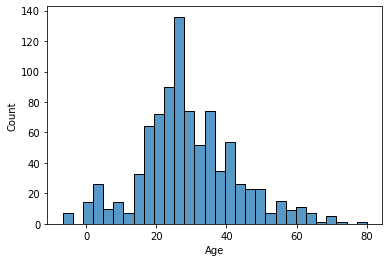

In [51]:
sns.histplot(data = df_update, x = 'Age')

Meskipun hasil imputasi ini masih terlihat tidak natural (ada spike di usia 20an), setidaknya lebih 'natural' daripada hanya mengisi dengan `median/mean`. 

##### Warning: Issue of Multicolinearity

Berhati-hatilah menggunakan metode ini. Metode ini terlihat 'canggih', namun memiliki sebuah konsekuensi yang cukup penting diingat:
- Hasil imputasi akan memiliki korelasi yang tinggi dengan kolom-kolom 'penebak' (karena kita menebak 'Age' berdasarkan nilai-nilai kolom-kolom 'Penebak')
- Padahal, sebuah asumsi 'linear regression' adalah bahwa tidak terdapat korelasi yang tinggi antar kolom-kolom (artinya, seharusnya antarkolom tidak memiliki hubungan yang erat)
- Kesannya, kolom 'Age' sangat dipengaruhi oleh kolom 'Pclass', 'SibSp', (yang kita gunakan untuk menebak). Padahal, belum tentu mereka ini saling berhubungan! Dan dengan mengimputasi seperti ini, kita seakan-akan memaksakan hubungan ini. Jika sebenarnya kolom 'Age' ini tidak memiliki hubungan dengan kolom-kolom 'Pclass', 'SibSp', dst, maka metode imputasi ini bisa dibilang keliru. 

#### Method 5: Other Methods!

Data Scientists are not only limited to 4 options to handle missing values. There are a lot of ‘customized’ and ‘highly specific’ method that people use to handle missing values. There are no ‘best solution’ to this problem - and you should explore each options together with your team & fellow stakeholders.

How to choose the best option? Create multiple ‘training data’ for your machine learning model, each training data is the result of each different missing values handling For example: From the same data source… 
- Data I is created if we remove the rows of missing values 
- Data II is created if we use mean/median 
- Data III is created if we use regression

How to choose the best option? Train machine learning model on Data I, II, and III Evaluate the model, which data-source gives the best performance? Then that should be the ‘best way’ to handle missing values moving forward.

#### Conclusion: No Easy Way

There is no correct 100% working way to deal with missing values. Tidak ada satu pun cara yang dapat dianggap sebagai 'cara paling benar' dalam berhadapan dengan missing values. Lakukanlah eksperimen dan catat hasilnya, untuk menemukan cara terbaik dalam menangani 'missing values'. 

# Data Normalization

#### 1. Min-Max Scaler

In [95]:
df_car = pd.read_csv('CarPrice_Assignment.csv')

df_car

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [97]:
# Ambil hanya beberapa kolom yang akan dinormalisasi

df_car = df_car[['peakrpm', 'compressionratio']]

df_car

,peakrpm,compressionratio
0,5000,9.0
1,5000,9.0
2,5000,9.0
3,5500,10.0
4,5500,8.0
...,...,...
200,5400,9.5
201,5300,8.7
202,5500,8.8
203,4800,23.0


In [98]:
X = np.array(df_car['peakrpm']).reshape(-1,1)

scaler = preprocessing.MinMaxScaler()

scaler.fit(X)
X_scaled = scaler.transform(X)
scaled_peakrpm = X_scaled.reshape(1,-1)[0]
df_car['min_max_sckit_peakrpm'] = scaled_peakrpm

C:\Users\USER\AppData\Local\Temp/ipykernel_1032/4188927708.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_car['min_max_sckit_peakrpm'] = scaled_peakrpm


In [99]:
df_car["min_max_peakrpm"] = (df_car["peakrpm"] - df_car["peakrpm"].min()) / (df_car["peakrpm"].max() - df_car["peakrpm"].min())

C:\Users\USER\AppData\Local\Temp/ipykernel_1032/1759794287.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_car["min_max_peakrpm"] = (df_car["peakrpm"] - df_car["peakrpm"].min()) / (df_car["peakrpm"].max() - df_car["peakrpm"].min())


#### 2. StandardScaler

In [100]:
X = np.array(df_car['compressionratio']).reshape(-1,1)

scaler = preprocessing.StandardScaler()

scaler.fit(X)
X_scaled = scaler.transform(X)
df_car['zscore_sckit_comprat'] = X_scaled.reshape(1,-1)[0]

C:\Users\USER\AppData\Local\Temp/ipykernel_1032/105359380.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_car['zscore_sckit_comprat'] = X_scaled.reshape(1,-1)[0]


In [101]:
df_car["zscore_comprat"] = (df_car["compressionratio"] - df_car["compressionratio"].mean()) / df_car["compressionratio"].std()

C:\Users\USER\AppData\Local\Temp/ipykernel_1032/4069155585.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_car["zscore_comprat"] = (df_car["compressionratio"] - df_car["compressionratio"].mean()) / df_car["compressionratio"].std()


In [102]:
df_car

,peakrpm,compressionratio,min_max_sckit_peakrpm,min_max_peakrpm,zscore_sckit_comprat,zscore_comprat
0,5000,9.0,0.346939,0.346939,-0.288349,-0.287645
1,5000,9.0,0.346939,0.346939,-0.288349,-0.287645
2,5000,9.0,0.346939,0.346939,-0.288349,-0.287645
3,5500,10.0,0.551020,0.551020,-0.035973,-0.035885
4,5500,8.0,0.551020,0.551020,-0.540725,-0.539405
...,...,...,...,...,...,...
200,5400,9.5,0.510204,0.510204,-0.162161,-0.161765
201,5300,8.7,0.469388,0.469388,-0.364062,-0.363173
202,5500,8.8,0.551020,0.551020,-0.338824,-0.337997
203,4800,23.0,0.265306,0.265306,3.244916,3.236992


# Data Binning

In [110]:
df_titanic = df_update.copy()

df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.00954,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00000,0,0,111369,30.0000,C


Kita bisa menggunakan `apply` untuk mengaplikasikan suatu fungsi terhadap sebuah kolom di dataframe. Contoh, kita ingin membuat sebuah kolom baru berisi pengelompokkan usia sebagai berikut:
- Usia 0 - 10: Kids
- Usia 10 - 20: Teens
- Usia 20 - 30: Young Adult
- Usia 30 - 50: Adult
- Usia >50: Old

In [111]:
def age_classifier(x):
    if x < 11:
        return 'Kid'
    elif x < 21:
        return 'Teen'
    elif x < 31:
        return 'Young Adult'
    elif x < 51:
        return 'Adult'
    else:
        return 'Old'

In [112]:
%%time
df_titanic['AgeClass'] = df_titanic['Age'].apply(age_classifier)

Wall time: 3.15 ms


(Operasi di atas memakan waktu 3 milisecond)

In [113]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Young Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Adult


Namun, hal ini bukanlah yang paling 'cepat'. Dalam dataset yang memiliki ukuran yang besar (jutaan baris), sebisa mungkin, hindari penggunaan `apply`, dan perbanyaklah penggunaan `numpy` secara langsung. Hal ini karena operasi `apply` lebih tidak efisien daripada operasi menggunakan `numpy` secara langsung.

Bagaimana dengan `apply` sebuah `function`? Gunakan `np.vectorize`.

In [114]:
%%time
df_titanic['AgeClass'] = np.vectorize(age_classifier)(df_titanic['Age'])

Wall time: 984 µs


Menggunakan `apply`, kita memakan waktu beberapa milisecond. Ya, masih sangat singkat. Tapi, tanpa menggunakan `apply`, kita memakan waktu 984 microsecond, lebih singkat lagi. Jika dataset kita besar (puluhan juta baris), maka hal ini akan menjadi 'game-changer'.